In [17]:
#tecotherm viewer by Igor Kiss (c) 2024

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime, timedelta
from typing import List, Tuple

In [19]:
def read_data(file):
    data = pd.read_csv(file, encoding='utf-8', parse_dates=True, skiprows=1)

    return data

In [20]:
data = read_data('/Volumes/NO NAME/log/20221003_234221.csv')

In [21]:
data.columns

Index(['date (UTC)', ' time (UTC)', ' date (local)', ' time (local)', ' mode',
       ' desired precool temperature', ' desired rectal cooling temperature',
       ' desired duration of cooling phase',
       ' desired rectal warming temperature',
       ' desired duration of re-warming phase',
       ' commanded (trajectory) temperature', ' measured rectal temperature',
       ' measured skin temperature', ' measured mattress temperature',
       ' system alarm', ' flow alarm', ' level alarm', ' temperature alarm',
       ' audio off'],
      dtype='object')

In [22]:
data.shape

(5332, 19)

In [23]:
data.head()

,date (UTC),time (UTC),date (local),time (local),mode,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,commanded (trajectory) temperature,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off
0,03.10.2022,22:43:00,03.10.2022,23:43:00,automatic,20.0,33.5,72,36.4,15,33.5,34.3,0.6,25.4,0,1,1,0,0
1,03.10.2022,22:44:00,03.10.2022,23:44:00,automatic,20.0,33.5,72,36.4,15,33.5,34.3,0.6,24.9,0,0,0,0,0
2,03.10.2022,22:45:00,03.10.2022,23:45:00,automatic,20.0,33.5,72,36.4,15,33.5,34.1,0.6,27.0,0,0,0,0,0
3,03.10.2022,22:46:00,03.10.2022,23:46:00,automatic,20.0,33.5,72,36.4,15,33.5,34.0,0.6,28.5,0,0,0,0,0
4,03.10.2022,22:47:00,03.10.2022,23:47:00,automatic,20.0,33.5,72,36.4,15,33.5,34.0,0.6,29.3,0,0,1,0,0


In [24]:
data.describe()

,desired precool temperature,desired rectal cooling temperature,desired duration of cooling phase,desired rectal warming temperature,desired duration of re-warming phase,commanded (trajectory) temperature,measured rectal temperature,measured skin temperature,measured mattress temperature,system alarm,flow alarm,level alarm,temperature alarm,audio off
count,5332.0,5332.0,5332.0,5.332000e+03,5332.0,5332.000000,5332.000000,5.332000e+03,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000,5332.000000
mean,20.0,33.5,72.0,3.640000e+01,15.0,33.779201,33.767798,6.000000e-01,32.803226,0.000188,0.000188,0.007314,0.000375,0.000750
std,0.0,0.0,0.0,7.106094e-15,0.0,0.703861,0.712580,1.110327e-16,3.242139,0.013695,0.013695,0.085218,0.019366,0.027382
min,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,31.100000,6.000000e-01,24.900000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.500000,6.000000e-01,29.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.500000,6.000000e-01,33.700000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.0,33.5,72.0,3.640000e+01,15.0,33.500000,33.600000,6.000000e-01,34.800000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20.0,33.5,72.0,3.640000e+01,15.0,36.400000,36.500000,6.000000e-01,39.200000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   date (UTC)                             5332 non-null   object 
 1    time (UTC)                            5332 non-null   object 
 2    date (local)                          5332 non-null   object 
 3    time (local)                          5332 non-null   object 
 4    mode                                  5332 non-null   object 
 5    desired precool temperature           5332 non-null   float64
 6    desired rectal cooling temperature    5332 non-null   float64
 7    desired duration of cooling phase     5332 non-null   int64  
 8    desired rectal warming temperature    5332 non-null   float64
 9    desired duration of re-warming phase  5332 non-null   int64  
 10   commanded (trajectory) temperature    5332 non-null   float64
 11   mea

In [26]:
data.columns = data.columns.str.strip()

In [27]:
# Remove leading and trailing spaces from the date and time strings
data['date (UTC)'] = data['date (UTC)'].str.strip()
data['time (UTC)'] = data['time (UTC)'].str.strip()
data['date (local)'] = data['date (local)'].str.strip()
data['time (local)'] = data['time (local)'].str.strip()

# Concatenate the date and time strings and convert them to datetime objects
data['datetime (UTC)'] = pd.to_datetime(data['date (UTC)'] + ' ' + data['time (UTC)'], dayfirst=True)
data['datetime (local)'] = pd.to_datetime(data['date (local)'] + ' ' + data['time (local)'], dayfirst=True)


In [28]:
start_date = data['datetime (local)'].min()
end_date = data['datetime (local)'].max()
total_duration = end_date - start_date

# Extract days
days = total_duration.days
# Convert remaining seconds to hours, minutes, and seconds
seconds = total_duration.seconds
hours = seconds // 3600
minutes = (seconds % 3600) // 60
seconds = (seconds % 60)

# Format the total therapy time as "X days, Y hours, Z minutes, W seconds"
total_therapy_time = f"{days} dní, {hours} hodín, {minutes} minút"

print("Total Therapy Time:", total_therapy_time)


Total Therapy Time: 3 dní, 16 hodín, 51 minút


In [52]:
alarms = data['flow alarm'].value_counts()
alarms

flow alarm
0    5331
1       1
Name: count, dtype: int64

In [29]:
flow_alarm = data[data['flow alarm'] == 1]['datetime (local)']
system_alarm = data[data['system alarm'] == 1]['datetime (local)']
level_alarm = data[data['level alarm'] == 1]['datetime (local)']
temperature_alarm = data[data['temperature alarm'] == 1]['datetime (local)']
alarm_off = data[data['audio off'] == 1]['datetime (local)']

In [38]:
def vertical_alarm_line(alarm_data: List[float], color: str, text: str) -> None:
    """
    Zobrazí vertikálnu čiaru pre každý alarm v zozname alarm_data.
    Text text sa zobrazí na vrchole každej čiary.
    Text je zobrazený farebne a tak aby sa čo najmenej prekrýval medzi sebou.
    """
    y_min, y_max = plt.ylim()
    base_y_center = np.mean([y_min, y_max])
    delta_y = (y_max - y_min) / 20  # Shift amount for text to avoid overlap
    
    for index, alarm in enumerate(alarm_data):
        plt.axvline(x=alarm, color=color, linestyle='--')
        # Adjust y_center for each alarm to avoid overlap
        y_offset = (index % 5 - 2) * delta_y  # Create an offset pattern
        y_position = base_y_center + y_offset
        plt.text(x=alarm, y=y_position, s=text, color=color, fontsize=14, ha='center')





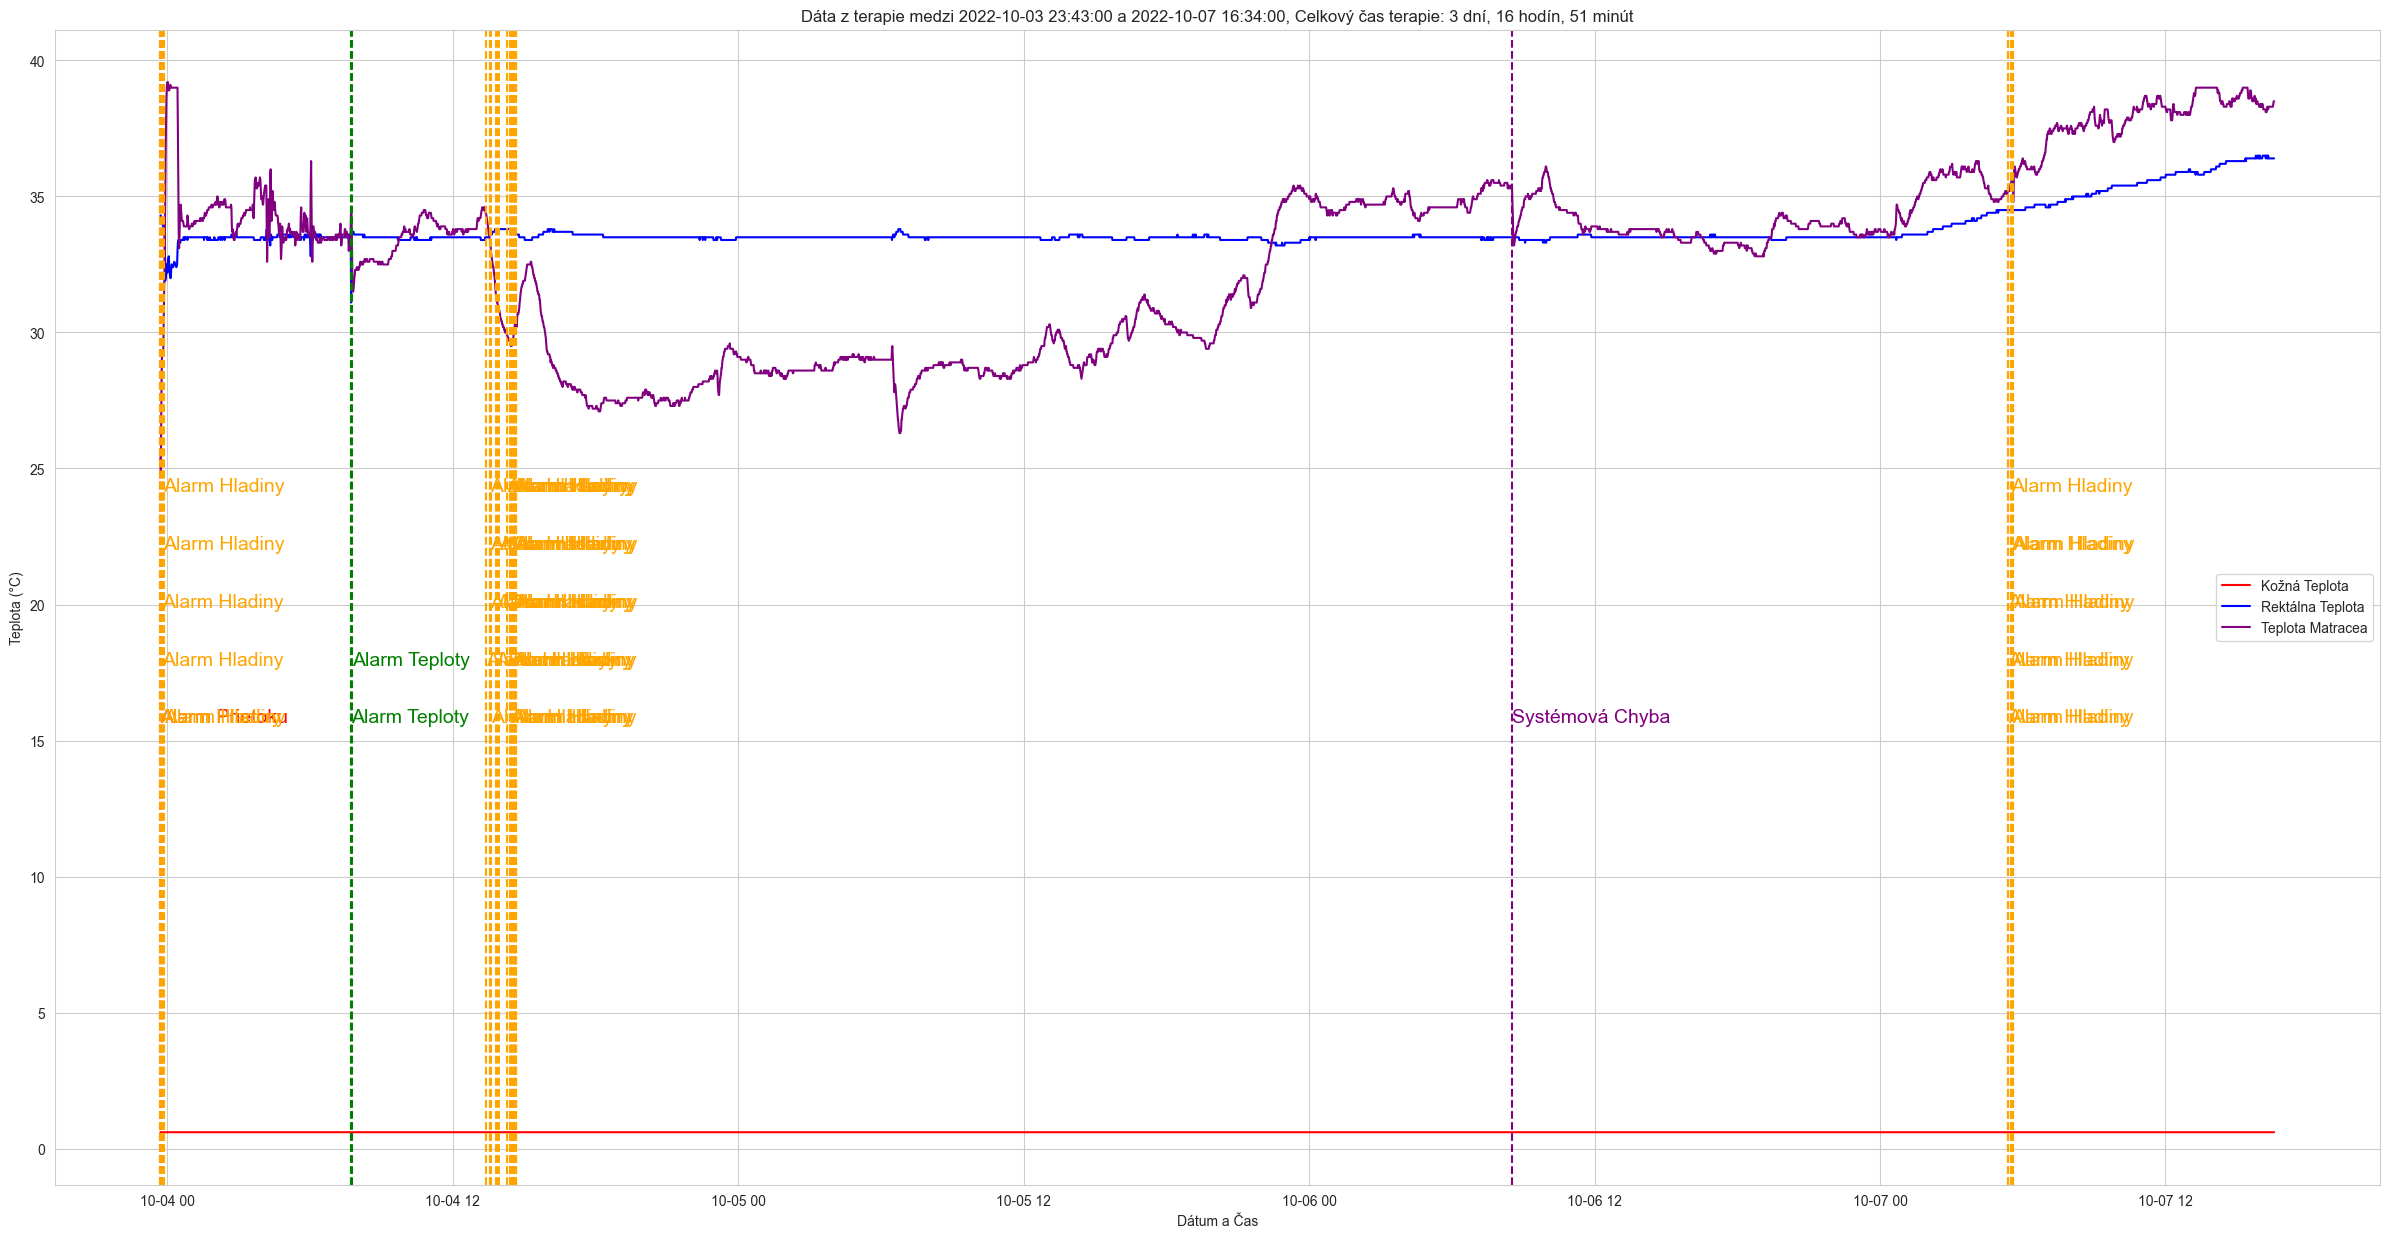

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(30, 15)) 
sns.lineplot(x='datetime (local)', y='measured skin temperature', data=data, color='red', label='Kožná Teplota')
sns.lineplot(x='datetime (local)', y='measured rectal temperature', data=data, color='blue', label='Rektálna Teplota')
sns.lineplot(x='datetime (local)', y='measured mattress temperature', data=data, color='purple', label='Teplota Matracea')
#sns.lineplot(x='datetime (local)', y='desired rectal warming temperature', data=data, color='green', label='Požadovaná Teplota', linestyle='-.')
vertical_alarm_line(temperature_alarm, 'green', 'Alarm Teploty')
vertical_alarm_line(flow_alarm, 'red', 'Alarm Prietoku')
vertical_alarm_line(system_alarm, 'purple', 'Systémová Chyba')
vertical_alarm_line(level_alarm, 'orange', 'Alarm Hladiny')
#vertical_alarm_line(alarm_off, 'orange', 'Level Alarm')
plt.ylabel('Teplota (°C)')
plt.xlabel('Dátum a Čas')
plt.title(f'Dáta z terapie medzi {start_date} a {end_date}, Celkový čas terapie: {total_therapy_time}')

plt.legend()

plt.show()